# Quickfind section

In [1]:
from quickfind import WeightedQuickUF

a = WeightedQuickUF(n=15)

# make one section with 4 elements
a.union(0,3)
a.union(0,4)
a.union(0,9)

# make another section with 3 elements
a.union(12,13)
a.union(12,14)

a.ids

[3, 1, 2, 3, 3, 5, 6, 7, 8, 3, 10, 11, 13, 13, 13]

In [2]:
a.union(12,9)
a.ids

[3, 1, 2, 3, 3, 5, 6, 7, 8, 3, 10, 11, 13, 3, 13]

In [3]:
a.union(10,13)
a.ids

[3, 1, 2, 3, 3, 5, 6, 7, 8, 3, 3, 11, 13, 3, 13]

In [4]:
a.heights

[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1]

In [5]:
a.find(12)
a.ids

[3, 1, 2, 3, 3, 5, 6, 7, 8, 3, 3, 11, 3, 3, 13]

In [6]:
a.heights

[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]

In [7]:
print(a.count())
a.ids

8


[3, 1, 2, 3, 3, 5, 6, 7, 8, 3, 3, 11, 3, 3, 3]

# Percolation section

In [8]:
from percolation import Percolation
a = Percolation(N=3)

import numpy as np
np.array(a.check()).reshape((3,3))

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [9]:
a.Open(2,2)
a.Open(1,2)
print(a.percolates())
np.array(a.check()).reshape((3,3))

False


array([[False,  True, False],
       [False,  True, False],
       [False, False, False]])

In [10]:
a.Open(3,3)
a.Open(2,3)
print(a.percolates())
np.array(a.check()).reshape((3,3))

True


array([[False,  True, False],
       [False,  True,  True],
       [False, False,  True]])

# Stats section

In [11]:
from stats import PercolationStats

import time

In [12]:
runtime = []
hi = []
means = []
lo = []
ids = range(2,21)
for n in ids:
    start = time.process_time()
    stats = PercolationStats(n=n, trials=200)
    final_time = time.process_time() - start
    runtime.append(final_time)
    
    hi.append(stats.confidenceHi)
    means.append(stats.mean)
    lo.append(stats.confidenceLo)

In [13]:
from pandas import DataFrame

DataFrame([ids, hi, means, lo, runtime], index=['grid_size', 'top_confidence', 'mean', 'low_confidence', 'runtime']).T.round(3).astype({'grid_size':int})

,grid_size,top_confidence,mean,low_confidence,runtime
0,2,0.680,0.664,0.647,1.391
1,3,0.633,0.618,0.603,0.047
2,4,0.613,0.596,0.579,0.156
3,5,0.597,0.581,0.566,0.125
4,6,0.583,0.569,0.556,0.188
5,7,0.598,0.587,0.575,0.203
6,8,0.606,0.595,0.583,0.281
7,9,0.598,0.587,0.577,0.234
8,10,0.596,0.586,0.577,0.438
9,11,0.601,0.591,0.581,0.562


Populating the interactive namespace from numpy and matplotlib


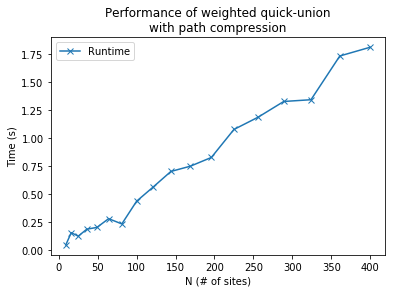

In [14]:
import matplotlib.pyplot as plt
%pylab inline

adjusted_x = [n**2 for n in ids[1:]]
plt.plot(adjusted_x, runtime[1:], marker='x', label='Runtime')
plt.title("Performance of weighted quick-union\nwith path compression")
plt.xlabel("N (# of sites)")
plt.ylabel("Time (s)")
plt.legend()
#plt.savefig('performance.png', dpi=500)
plt.show()